![amazon_logo](banner.png)
___

##### import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#visualizations
#!pip install wordcloud
from wordcloud import WordCloud
from pylab import *

# Step 4b - Exploratory Data Analysis
    a) Importing data
        - corpus_df
        - q_corpus_df
    
    b) N-Grams for Amazon Reviews
    
    c) N-Grams for Amazon Q/A

### a) Importing data

In [2]:
#import amazon_corpus_data.csv file
corpus_df = pd.read_csv("amazon_corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head(3)

(100000, 1)


,review
0,awesine perfect new parent able keep track bab...
1,required new parent book life saver helpful ab...
2,grandmother watching baby help know exactly ba...


In [3]:
#import amazon_q_corpus_data.csv file
q_corpus_df = pd.read_csv("amazon_q_corpus_data.csv")

q_corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(q_corpus_df.shape)
q_corpus_df.head(3)

(28933, 1)


,question
0,book contain vaccination immunization page pag...
1,book section baby shower
2,religious based book wondering since pic bible...


##### Check for NaN Values in corpus_df

In [4]:
is_NaN = corpus_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_df[row_has_NaN]
print(rows_with_NaN)

      review
23294    NaN
34418    NaN


In [5]:
corpus_df = corpus_df.dropna()
print(corpus_df.isna().sum())

review    0
dtype: int64


##### Check for NaN Values in q_corpus_df

In [6]:
is_NaN = q_corpus_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = q_corpus_df[row_has_NaN]
print(rows_with_NaN)

      question
8888       NaN
10885      NaN
11016      NaN
13573      NaN
17038      NaN
22572      NaN


In [7]:
q_corpus_df = q_corpus_df.dropna()
print(q_corpus_df.isna().sum())

question    0
dtype: int64


### b) N-Grams for Reviews

Processing maxed out at a sample of approximately k = 6000. Reviews much longer on avg. then questions.

In [8]:
sample_corpus_df = corpus_df.sample(6000)

In [9]:
#entire corpus series into seperate strings
corpus_series = sample_corpus_df['review'].apply(lambda x: str(x))


print(len(corpus_series))
corpus_series

6000


96529    wonderful addition b ready stroller got today ...
47504    baby bubble smile fabulous bought others past ...
32457    perfect davinci thicker mini mattress baby thi...
92818    great containing crumb mess favorite thing pla...
15885    thing awesome take good minute figure put thin...
                               ...                        
22496    mom love dad much bought intention baby loving...
21786    great bib drying rack bought flutter floral bi...
24435    pretty good okay impressed toothbrush hoped fu...
76202    love little one love toothbrush easy hold rubb...
56909    great quality great fit quality washed well li...
Name: review, Length: 6000, dtype: object

##### Review Unigrams

In [10]:
#getting unigrams  
vectorizer = CountVectorizer() 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for unigrams
vectorizer = TfidfVectorizer() 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
uni_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
uni_words = (uni_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", uni_words.head(50)) 



Words : 
            term        rank
682        baby  213.221980
4598      great  209.432086
6126       love  193.230174
7081        one  171.278962
1152     bottle  145.053500
5972       like  142.570601
11389       use  140.988400
6603      month  124.420551
6039     little  119.125485
11893      work  118.383526
3301       easy  117.778214
11916     would  116.873474
4433        get  116.407205
11727      well  115.349873
4520       good  114.483869
8026    product  109.983651
9703        son  108.125899
10931       toy  107.515934
10797      time  104.911321
8340     really  100.742294
7065        old  100.444610
2845     diaper  100.242479
3978        fit   93.920223
9103       seat   92.788532
2606   daughter   88.712067
6674       much   88.561801
1171     bought   87.091472
333        also   86.901733
741         bag   85.963417
9659       soft   80.871121
6853       nice   80.839940
8200        put   79.527576
5655       keep   77.541371
2544       cute   77.190280
6221    

##### Review Bigrams

In [11]:
#getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for bigrams
vectorizer = TfidfVectorizer(ngram_range =(2, 2)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
bi_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
bi_words = (bi_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", bi_words.head(50)) 

MemoryError: 

##### Review Trigrams

In [13]:
#getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names())  

#applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray())  
  
#getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
tri_ranking = pd.DataFrame(data1, columns = ['term','rank']) 
tri_words = (tri_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", tri_words.head(20)) 



Words head : 
                               term      rank
140533              month old love  8.389948
208069               son month old  6.075502
60506              dr brown bottle  5.792677
140625               month old son  5.400947
140422          month old daughter  5.031913
129113              love love love  4.625640
86781                 get job done  4.483298
258611  would definitely recommend  4.251544
14029               baby month old  3.914469
64056            easy put together  3.636951
93034              graco pack play  3.635857
37540           changing pad cover  3.418530
28016             bought month old  3.184028
238413                two year old  3.118045
53522           daughter month old  3.106286
258976      would highly recommend  3.098946
140380              month old baby  3.030946
257011            work really well  2.865165
258090           worth every penny  2.863425
140636             month old still  2.831091


##### Review Unigrams - Visualization

In [40]:
print(corpus_df.head())
corpus_all = ' '.join(corpus_df['review'])

                                              review
0  awesine perfect new parent able keep track bab...
1  required new parent book life saver helpful ab...
2  grandmother watching baby help know exactly ba...
3  repeat buyer bought time older son bought newb...
4  great wanted alternative printing daily log sh...


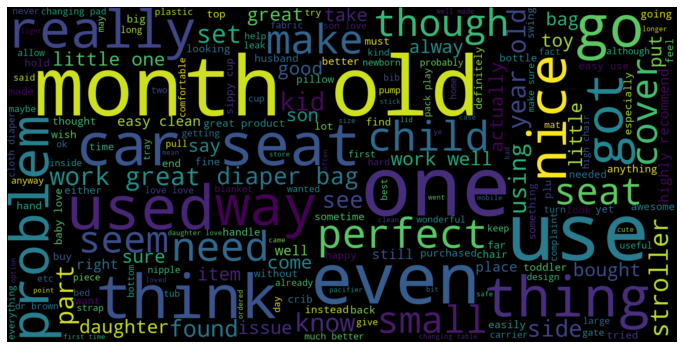

In [41]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(corpus_all)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 300 words')

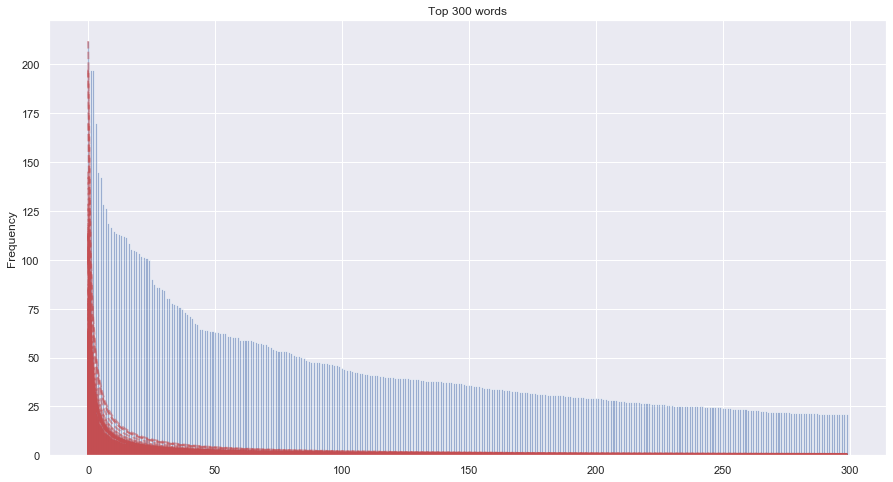

In [42]:
y_pos = np.arange(300)
plt.figure(figsize=(15,8))
s = 1
expected_zipf = [uni_ranking.sort_values(by='rank', ascending=False)['rank']/(i+1)**s for i in y_pos]
plt.bar(y_pos, uni_ranking.sort_values(by='rank', ascending=False)['rank'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 words')

### c) N-Grams for Q/A

Processing maxed out at a sample of approximately k = 10000. Can increase k incrementally through further trial and error.

In [8]:
#sample k questions
sample_q_corpus_df = q_corpus_df.sample(10000)

In [9]:
#entire corpus series into seperate strings
q_corpus_series = sample_q_corpus_df['question'].apply(lambda x: str(x))


print(len(q_corpus_series))
q_corpus_series

10000


15048                                           waterproof
7511             used alone doubler used microfiber insert
10044    shim thick enough work door concerned make cus...
25386                                         cup bpa free
9875                                      bowl really slip
                               ...                        
2403              height window bar window inch heigh wide
4446                          contain formamide ingredient
17145            compatible baby jogger city mini stroller
15677                                                  bed
260                                              tall gate
Name: question, Length: 10000, dtype: object

##### Q/A Unigrams

In [10]:
#getting unigrams  
vectorizer = CountVectorizer() 
X1 = vectorizer.fit_transform(q_corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for unigrams
vectorizer = TfidfVectorizer() 
X2 = vectorizer.fit_transform(q_corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
q_uni_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
q_uni_words = (q_uni_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", q_uni_words.head(50)) 



Words : 
            term        rank
4337       seat  271.465376
1921        fit  270.261767
4910   stroller  183.353380
5745       work  170.646613
5479        use  169.743845
350        baby  160.120933
784         car  158.004421
1035       come  152.380850
4544       size  151.096615
3391        one  134.922191
587      bottle  131.682680
216      anyone  129.971432
5757      would  129.051794
3008   mattress  127.490579
1233       crib  125.504433
2936       made  119.146942
5480       used  105.643945
3264       need  104.323053
3381        old  102.680591
3852    product   92.478680
2711       know   89.807389
5650     weight   89.403983
2830       like   89.286084
5119     thanks   88.243730
1198      cover   85.657345
1444  dimension   80.608483
3177      month   77.706887
2973       many   77.637225
2129        get   76.461096
2521     infant   72.799508
379         bag   71.069498
4485       side   68.983958
904       child   68.458247
1024      color   67.084272
3155    

##### Q/A Bigrams

In [11]:
#getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(q_corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for bigrams
vectorizer = TfidfVectorizer(ngram_range =(2, 2)) 
X2 = vectorizer.fit_transform(q_corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
q_bi_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
q_bi_words = (q_bi_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", q_bi_words.head(50)) 



Words : 
                    term        rank
5325           car seat  102.711439
4441           bpa free   44.128208
20338         month old   40.821967
36895      weight limit   36.265767
1424        anyone know   33.765021
38450          year old   33.702994
18558  machine washable   24.510414
38204         would fit   23.060121
22844         pack play   22.532388
26003       rear facing   22.197322
38337        would work   21.513474
27936      seat recline   20.620522
27796          seat fit   19.864338
15537        infant car   19.775742
11633         fit graco   16.994772
1480        anyone used   16.145162
5857       changing pad   16.108303
18640          made usa   15.498621
9757    double stroller   15.180736
8207      crib mattress   15.167898
8375         cup holder   14.812538
38236        would like   14.529441
1473       anyone tried   14.409236
16959      latch system   14.263525
2243        baby jogger   13.786227
6253          city mini   13.529254
28736         sh

##### Q/A Trigrams

In [12]:
#getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(q_corpus_series)  
features = (vectorizer.get_feature_names())  

#applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(q_corpus_series) 
scores = (X2.toarray())  
  
#getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
q_tri_ranking = pd.DataFrame(data1, columns = ['term','rank']) 
q_tri_words = (q_tri_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", q_tri_words.head(50)) 



Words head : 
                           term       rank
17638          infant car seat  19.090235
6241              car seat fit  11.405246
2718          baby jogger city   9.396948
15670          graco pack play   8.808836
7921             come car seat   7.249941
6315         car seat stroller   7.083750
11190          dr brown bottle   6.687031
6200             car seat base   6.304411
1838      anyone tried newborn   6.000000
23031           month old baby   5.894129
13081          fit baby jogger   5.676110
42984          would like know   5.313243
8775      convertible car seat   5.220304
38384  treated flame retardant   5.136792
33838       sling zipper pouch   5.000000
28172         product bpa free   4.988490
18292       jogger city select   4.986168
8097           come rain cover   4.863821
13152          fit britax safe   4.818196
13466            fit month old   4.772546
31308           seat come base   4.618192
1532       anyone else problem   4.589920
7318             

##### Q/A Unigrams - Visualization

In [43]:
print(q_corpus_df.head())
q_corpus_all = ' '.join(q_corpus_df['question'])

                                            question
0  book contain vaccination immunization page pag...
1                           book section baby shower
2  religious based book wondering since pic bible...
3                                               year
4                                          year book


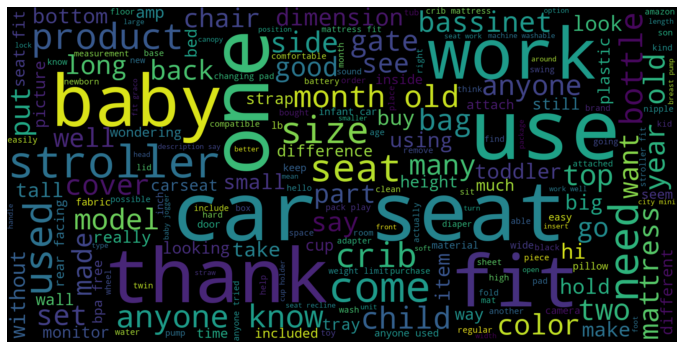

In [44]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(q_corpus_all)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 300 words')

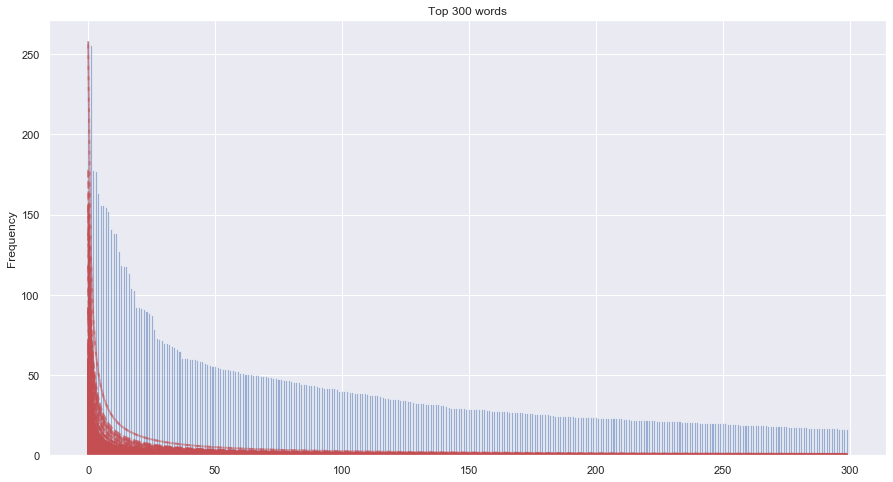

In [46]:
y_pos = np.arange(300)
plt.figure(figsize=(15,8))
s = 1
expected_zipf = [q_uni_ranking.sort_values(by='rank', ascending=False)['rank']/(i+1)**s for i in y_pos]
plt.bar(y_pos, q_uni_ranking.sort_values(by='rank', ascending=False)['rank'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 words')

### End of Step 4b